<a href="https://colab.research.google.com/github/soulayman-al-abdallah/TimeSeries-Cryptocurrencies-Analysis/blob/main/Time_Series_Crypto_UnStable_Coins_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Time Series analysis** of *UnStable cryptocurrencies*.
--------------


Source of the data: An excel file extracted from CoinMarketCap and saved on Github.

Data Science work done by: **Eng. Soulayman Al-Abdallah**.
Some technical comments added by: **NFT trader Rami Zohbi**.

Content:
- Importing modules and data
- FFT DataFrame Preparation
- Sol DataFrame Preparation
- BTC DataFrame Preparation
- Visualizing Market Volumes
- Visualizing Prices
- Visualizing Simple Daily Returns and their cumulatives
- Series Decomposition
- Autocorrelation Check

Time series analysis of the **unstable coins** [ftt-sol-btc] based on multiple features.

Move ahead to the **Visualizing Market Volumes** part, to see the data shape, and visualise the features [volumes, market cap, changes..]

#**Importing modules and data**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn import preprocessing

import warnings # Supress warnings 
warnings.filterwarnings('ignore')

In [ ]:
# from google.colab import files
# uploaded_file = files.upload()

In [ ]:
!git clone https://github.com/soulayman-al-abdallah/public-repo.git

fatal: destination path 'public-repo' already exists and is not an empty directory.


In [ ]:
xls = pd.ExcelFile('/content/public-repo/coin compare.xlsx')
df_unstable = pd.read_excel(xls, 'ftt')
df_unstable

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,NaN,ftt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,sol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Date,Open*,High,Low,Close**,Volume,Market Cap,volume to market capo,price increase per coin,...,Date,Open*,High,Low,Close**,Volume,Market Cap,volume to market capo,price increase per coin,Price percentage
2,NaN,"Nov 28, 2022",1.32,1.33,1.28,1.3,6250102,425949656,0.014673,-0.02,...,"Nov 28, 2022",14.11,14.15,12.82,13.4,447463511,4867955079,0.09192,-0.72,-0.050992
3,NaN,"Nov 27, 2022",1.36,1.38,1.32,1.32,7301184,432651476,0.016875,-0.04,...,"Nov 27, 2022",14.16,14.41,14.08,14.12,225035409,5124488710,0.043914,-0.04,-0.002825
4,NaN,"Nov 26, 2022",1.4,1.43,1.35,1.36,43773375,448921786,0.097508,-0.04,...,"Nov 26, 2022",14.06,14.89,14.03,14.16,333271818,5140267406,0.064836,0.1,0.007112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1205,NaN,"Aug 13, 2019",1.91,1.92,1.72,1.72,3769508,43037376,0.087587,-0.19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1206,NaN,"Aug 12, 2019",1.84,1.91,1.76,1.91,41144878,47641659,0.863632,0.07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1207,NaN,"Aug 11, 2019",1.79,1.9,1.72,1.84,4439506,46017690,0.096474,0.05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1208,NaN,"Aug 10, 2019",1.88,1.99,1.76,1.79,5218469,44786968,0.116518,-0.09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_unstable.columns = df_unstable.iloc[1]
df_unstable = df_unstable.iloc[2:,1:]

df_unstable.columns.values[9] = 'price increase percentage'
df_unstable.columns.values[19] = 'price increase percentage'

#left part of the df_unstable is for ftt and the right part is for sol
df_unstable

1,Date,Open*,High,Low,Close**,Volume,Market Cap,volume to market capo,price increase per coin,price increase percentage,Date,Open*,High,Low,Close**,Volume,Market Cap,volume to market capo,price increase per coin,price increase percentage
2,"Nov 28, 2022",1.32,1.33,1.28,1.3,6250102,425949656,0.014673,-0.02,-0.015152,"Nov 28, 2022",14.11,14.15,12.82,13.4,447463511,4867955079,0.09192,-0.72,-0.050992
3,"Nov 27, 2022",1.36,1.38,1.32,1.32,7301184,432651476,0.016875,-0.04,-0.029412,"Nov 27, 2022",14.16,14.41,14.08,14.12,225035409,5124488710,0.043914,-0.04,-0.002825
4,"Nov 26, 2022",1.4,1.43,1.35,1.36,43773375,448921786,0.097508,-0.04,-0.028571,"Nov 26, 2022",14.06,14.89,14.03,14.16,333271818,5140267406,0.064836,0.1,0.007112
5,"Nov 25, 2022",1.38,1.53,1.35,1.4,33628058,460622096,0.073006,0.02,0.014493,"Nov 25, 2022",14.58,14.58,13.96,14.06,323667943,5103645623,0.063419,-0.52,-0.035665
6,"Nov 24, 2022",1.3,1.4,1.28,1.38,12158286,452753321,0.026854,0.08,0.061538,"Nov 24, 2022",14.35,14.85,13.92,14.58,620159372,5292084938,0.117186,0.23,0.016028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1205,"Aug 13, 2019",1.91,1.92,1.72,1.72,3769508,43037376,0.087587,-0.19,-0.099476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1206,"Aug 12, 2019",1.84,1.91,1.76,1.91,41144878,47641659,0.863632,0.07,0.038043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1207,"Aug 11, 2019",1.79,1.9,1.72,1.84,4439506,46017690,0.096474,0.05,0.027933,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1208,"Aug 10, 2019",1.88,1.99,1.76,1.79,5218469,44786968,0.116518,-0.09,-0.047872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **FFT DataFrame Preparation**

In [ ]:
#Extracting the data related to fft
df_fft = df_unstable.iloc[:,:10]
print('The df_fft shape is: ', df_fft.shape)

#removing rows containng null values
df_fft = df_fft.dropna()
print('The df_fft shape becomes: ',df_fft.shape)

df_fft.head(3)

The df_fft shape is:  (1208, 10)
The df_fft shape becomes:  (1207, 10)


1,Date,Open*,High,Low,Close**,Volume,Market Cap,volume to market capo,price increase per coin,price increase percentage
2,"Nov 28, 2022",1.32,1.33,1.28,1.3,6250102,425949656,0.014673,-0.02,-0.015152
3,"Nov 27, 2022",1.36,1.38,1.32,1.32,7301184,432651476,0.016875,-0.04,-0.029412
4,"Nov 26, 2022",1.4,1.43,1.35,1.36,43773375,448921786,0.097508,-0.04,-0.028571


In [ ]:
cols = ['Date', 'Close**','Volume', 'Market Cap','volume to market capo']
df_fft = df_fft[cols]

df_fft.rename(columns = {'Close**':'Close', 'volume to market capo':'V-to-MarCap'}, inplace = True)

df_fft.head()

1,Date,Close,Volume,Market Cap,V-to-MarCap
2,"Nov 28, 2022",1.3,6250102,425949656,0.014673
3,"Nov 27, 2022",1.32,7301184,432651476,0.016875
4,"Nov 26, 2022",1.36,43773375,448921786,0.097508
5,"Nov 25, 2022",1.4,33628058,460622096,0.073006
6,"Nov 24, 2022",1.38,12158286,452753321,0.026854


In [ ]:
# using dictionary to convert specific columns from 'object' type to integers and floats
convert_dict = {'Date': object,
                'Close': float,
                'Volume': int,
                'Market Cap': int,
                'V-to-MarCap': float}
df_fft = df_fft.astype(convert_dict)

# convert the 'Date' column from string type (object) to datetime format
df_fft['Date']= pd.to_datetime(df_fft['Date'])
df_fft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1207 entries, 2 to 1208
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         1207 non-null   datetime64[ns]
 1   Close        1207 non-null   float64       
 2   Volume       1207 non-null   int64         
 3   Market Cap   1207 non-null   int64         
 4   V-to-MarCap  1207 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 56.6 KB


In [ ]:
#Indexing by Date column
df_fft = df_fft.set_index(['Date'])
df_fft = df_fft.reindex(index=df_fft.index[::-1])
df_fft.head(3)

1,Close,Volume,Market Cap,V-to-MarCap
Date,,,,
2019-08-10,1.79,5218469,44786968,0.116518
2019-08-11,1.84,4439506,46017690,0.096474
2019-08-12,1.91,41144878,47641659,0.863632


In [ ]:
df_fft['pct-change'] = df_fft['Close'].pct_change()
df_fft = df_fft.dropna()
df_fft.head(3)

1,Close,Volume,Market Cap,V-to-MarCap,pct-change
Date,,,,,
2019-08-11,1.84,4439506,46017690,0.096474,0.027933
2019-08-12,1.91,41144878,47641659,0.863632,0.038043
2019-08-13,1.72,3769508,43037376,0.087587,-0.099476




---

---



---





---



---



---



# **Sol DataFrame Preparation**

In [ ]:
#Extracting the data related to fft
df_sol = df_unstable.iloc[:,10:20]
print('The df_sol shape is: ', df_sol.shape)

#removing rows containng null values
df_sol = df_sol.dropna()
print('The df_sol shape becomes: ',df_sol.shape)

df_sol.head(3)

The df_sol shape is:  (1208, 10)
The df_sol shape becomes:  (910, 10)


1,Date,Open*,High,Low,Close**,Volume,Market Cap,volume to market capo,price increase per coin,price increase percentage
2,"Nov 28, 2022",14.11,14.15,12.82,13.4,447463511,4867955079,0.09192,-0.72,-0.050992
3,"Nov 27, 2022",14.16,14.41,14.08,14.12,225035409,5124488710,0.043914,-0.04,-0.002825
4,"Nov 26, 2022",14.06,14.89,14.03,14.16,333271818,5140267406,0.064836,0.1,0.007112


In [ ]:
cols = ['Date', 'Close**','Volume', 'Market Cap','volume to market capo']
df_sol = df_sol[cols]

df_sol.rename(columns = {'Close**':'Close', 'volume to market capo':'V-to-MarCap'}, inplace = True)

df_sol.head()

1,Date,Close,Volume,Market Cap,V-to-MarCap
2,"Nov 28, 2022",13.4,447463511,4867955079,0.09192
3,"Nov 27, 2022",14.12,225035409,5124488710,0.043914
4,"Nov 26, 2022",14.16,333271818,5140267406,0.064836
5,"Nov 25, 2022",14.06,323667943,5103645623,0.063419
6,"Nov 24, 2022",14.58,620159372,5292084938,0.117186


In [ ]:
# using dictionary to convert specific columns from 'object' type to integers and floats
convert_dict = {'Date': object,
                'Close': float,
                'Volume': int,
                'Market Cap': int,
                'V-to-MarCap': float}
df_sol = df_sol.astype(convert_dict)

# convert the 'Date' column from string type (object) to datetime format
df_sol['Date']= pd.to_datetime(df_sol['Date'])
df_sol.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 910 entries, 2 to 911
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         910 non-null    datetime64[ns]
 1   Close        910 non-null    float64       
 2   Volume       910 non-null    int64         
 3   Market Cap   910 non-null    int64         
 4   V-to-MarCap  910 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 42.7 KB


In [ ]:
#Indexing by Date column
df_sol = df_sol.set_index(['Date'])
df_sol = df_sol.reindex(index=df_sol.index[::-1])
df_sol.head(3)

1,Close,Volume,Market Cap,V-to-MarCap
Date,,,,
2020-06-02,0.5647,1295757,9741011,0.133021
2020-06-03,0.5866,877446,10119648,0.086707
2020-06-04,0.5873,901641,10131321,0.088995


In [ ]:
df_sol['pct-change'] = df_sol['Close'].pct_change()
df_sol = df_sol.dropna()
df_sol.head(3)

1,Close,Volume,Market Cap,V-to-MarCap,pct-change
Date,,,,,
2020-06-03,0.5866,877446,10119648,0.086707,0.038782
2020-06-04,0.5873,901641,10131321,0.088995,0.001193
2020-06-05,0.6612,4322092,11405329,0.378954,0.125830


# **BTC DataFrame Preparation**

In [ ]:
!pip install cryptocmd
from cryptocmd import CmcScraper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# initialise scraper without time interval for max historical data
scraper = CmcScraper("BTC")
# Pandas dataFrame for the same data
df_btc = scraper.get_dataframe()
df_btc.head(3)

,Date,Open,High,Low,Close,Volume,Market Cap
0,2022-12-22,16818.380288,16866.674327,16592.407454,16830.341424,1.644157e+10,3.238314e+11
1,2022-12-21,16904.527354,16916.799882,16755.912213,16817.534387,1.488295e+10,3.235705e+11
2,2022-12-20,16441.786800,17012.984705,16427.867239,16906.305210,2.272210e+10,3.252635e+11


In [ ]:
cols = ['Date', 'Close','Volume', 'Market Cap']
df_btc = df_btc[cols]

In [ ]:
#Indexing by Date column
df_btc['Date'] = pd.to_datetime(df_btc['Date']) 
df_btc = df_btc.set_index(['Date'])
df_btc = df_btc.reindex(index=df_btc.index[::-1])
df_btc

,Close,Volume,Market Cap
Date,,,
2013-04-28,134.210007,0.000000e+00,1.488567e+09
2013-04-29,144.539993,0.000000e+00,1.603769e+09
2013-04-30,139.000000,0.000000e+00,1.542813e+09
2013-05-01,116.989998,0.000000e+00,1.298955e+09
2013-05-02,105.209999,0.000000e+00,1.168517e+09
...,...,...,...
2022-12-18,16757.977403,1.092435e+10,3.223799e+11
2022-12-19,16439.679646,1.722107e+10,3.162715e+11
2022-12-20,16906.305210,2.272210e+10,3.252635e+11


In [ ]:
#Chunking only the data concerning the same period of ftt
start_date = '2019-08-10'
end_date = '2022-11-28'
df_btc = df_btc[start_date : end_date]
df_btc

,Close,Volume,Market Cap
Date,,,
2019-08-10,11354.024218,1.812536e+10,2.028900e+11
2019-08-11,11523.579378,1.577437e+10,2.059416e+11
2019-08-12,11382.615956,1.364720e+10,2.034415e+11
2019-08-13,10895.830436,1.668150e+10,1.947627e+11
2019-08-14,10051.703931,1.999084e+10,1.796928e+11
...,...,...,...
2022-11-24,16604.465018,2.612904e+10,3.190742e+11
2022-11-25,16521.841019,1.867826e+10,3.174994e+11
2022-11-26,16464.281079,1.800001e+10,3.164048e+11


In [ ]:
df_btc['V-to-MarCap'] = df_btc['Volume'] / df_btc['Market Cap']

In [ ]:
df_btc['pct-change'] = df_btc['Close'].pct_change()
df_btc = df_btc.dropna()
df_btc.head(3)

,Close,Volume,Market Cap,V-to-MarCap,pct-change
Date,,,,,
2019-08-11,11523.579378,1.577437e+10,2.059416e+11,0.076596,0.014933
2019-08-12,11382.615956,1.364720e+10,2.034415e+11,0.067082,-0.012233
2019-08-13,10895.830436,1.668150e+10,1.947627e+11,0.085650,-0.042766


#**Visualizing Market Volumes**

Now the 3 dataframes of the 3 currencies [FFT-SOL-BTC] are ready as follows, and from there, we'll start visualizing and comparing:

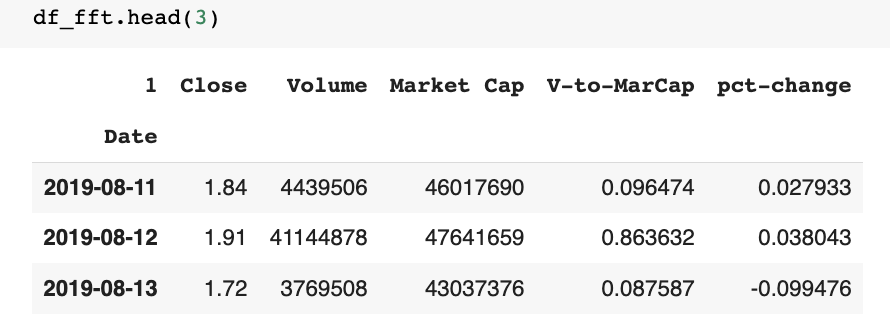

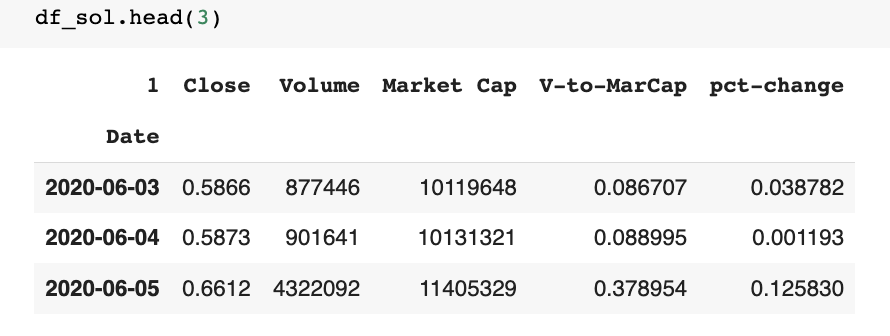

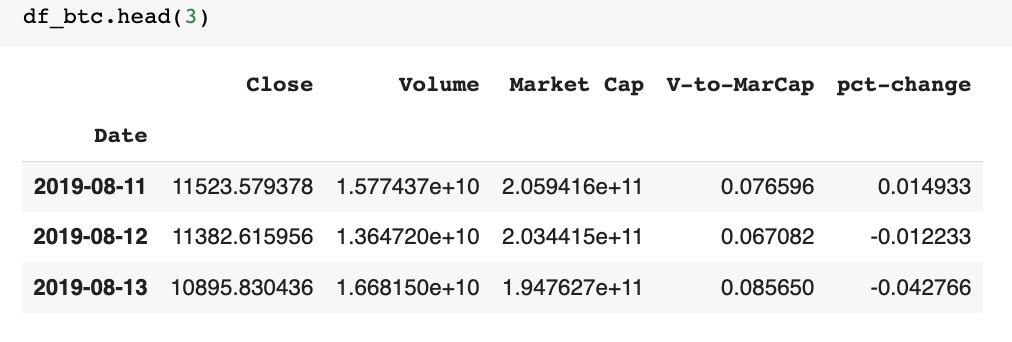

⭕ The **market volume** change of both **ftt** and **sol** currencies:

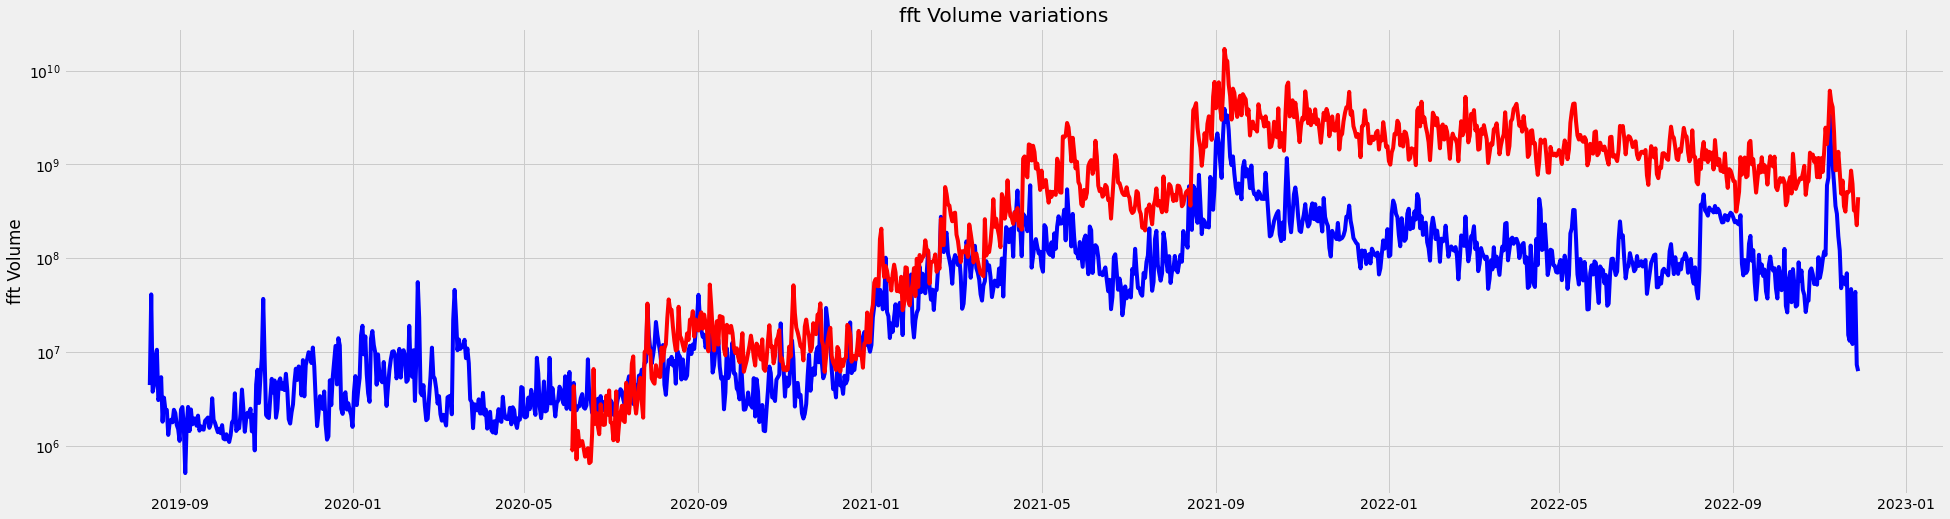

In [ ]:
plt.figure(figsize = (30,8))
plt.plot( df_fft['Volume'], color='blue')
plt.plot( df_sol['Volume'], color='red')
plt.ylabel('fft Volume')
plt.yscale('log')
plt.title('fft Volume variations')

plt.show()

⭕ The **log market volume** change of **ftt**, **sol** and **btc** currencies to compare between them, because the values related to btc are extremely high:

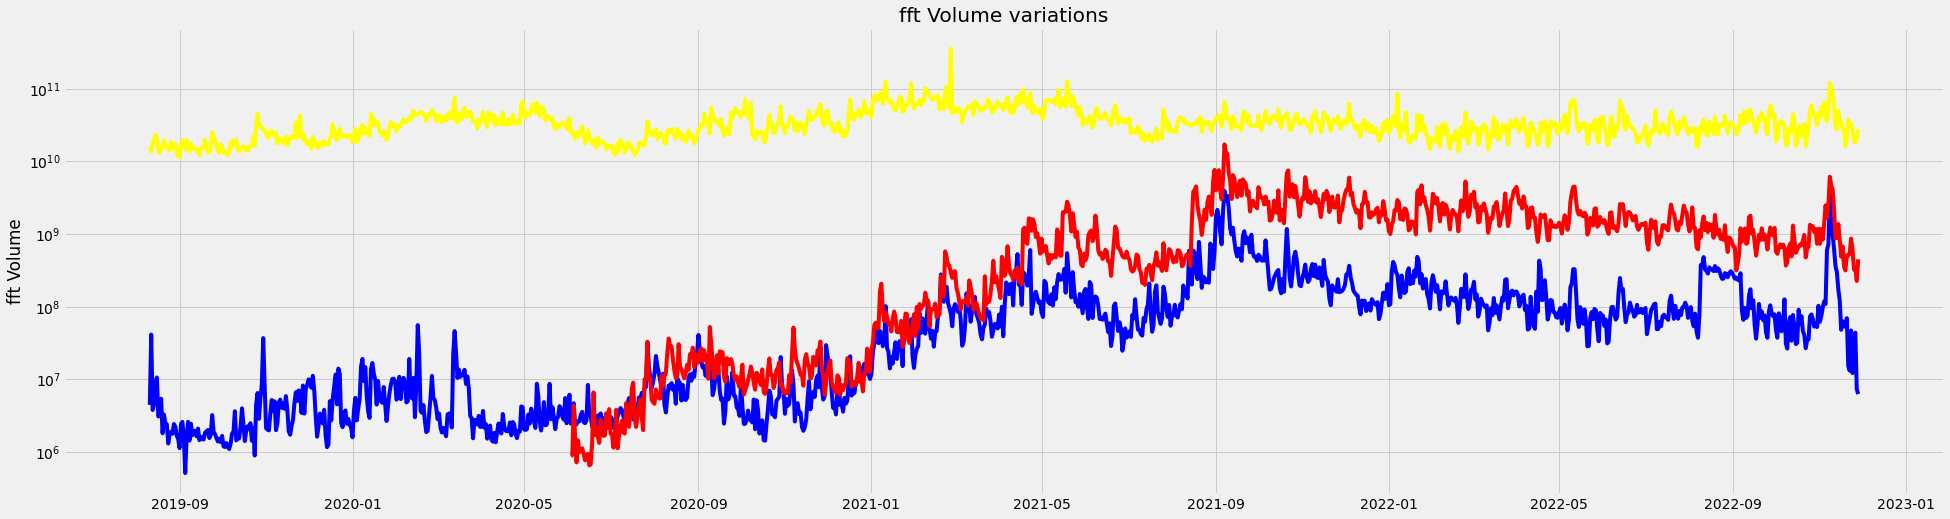

In [ ]:
plt.figure(figsize = (30,8))
plt.plot( df_fft['Volume'], color='blue')
plt.plot( df_sol['Volume'], color='red')
plt.plot( df_btc['Volume'], color='yellow')
plt.ylabel('fft Volume')
plt.yscale('log')
plt.title('fft Volume variations')

plt.show()

**⭐ Rami**:This chart shows that SOL (Which was one of the most high return cryptocurrencies in 2021-2022) and FTT are related to BTC Price and Volume movement even with the FTX collapse happened in late 2022.
The FTX collapse which led for the big crash in the market was not predictable. Therefore the data in this case could help us only in short term analysis as a pattern for the market movement.



---



# **Visualizing Prices**

⭕ So now we prepared **3 dataframes** having **same columns**:
- **df_fft** for the **fft** coin  starting 2019-08-11
- **df_sol** for the **sol** coin  starting 2020-06-03
- **df_btc** for the **btc** currency starting 2019-08-11

and they all end at 2022-11-28, for example, let's visualize the **df_fft** dataframe:

In [ ]:
df_fft.head(3)

1,Close,Volume,Market Cap,V-to-MarCap,pct-change
Date,,,,,
2019-08-11,1.84,4439506,46017690,0.096474,0.027933
2019-08-12,1.91,41144878,47641659,0.863632,0.038043
2019-08-13,1.72,3769508,43037376,0.087587,-0.099476


Visualizing the prices of each of sol, fft and btc.

In [ ]:
#Creating a df for the close values only
df_close = df_fft

cols = ['Close']
df_close = df_close[cols]

df_close.rename(columns = {'Close':'Close-fft'}, inplace = True)
df_close['Close-sol'] = df_sol['Close']
df_close['Close-btc'] = df_btc['Close']

df_close.head(3)

1,Close-fft,Close-sol,Close-btc
Date,,,
2019-08-11,1.84,NaN,11523.579378
2019-08-12,1.91,NaN,11382.615956
2019-08-13,1.72,NaN,10895.830436


**Visualizing the values for each crypto alone:**

Text(0.5, 1.0, 'Close-btc')

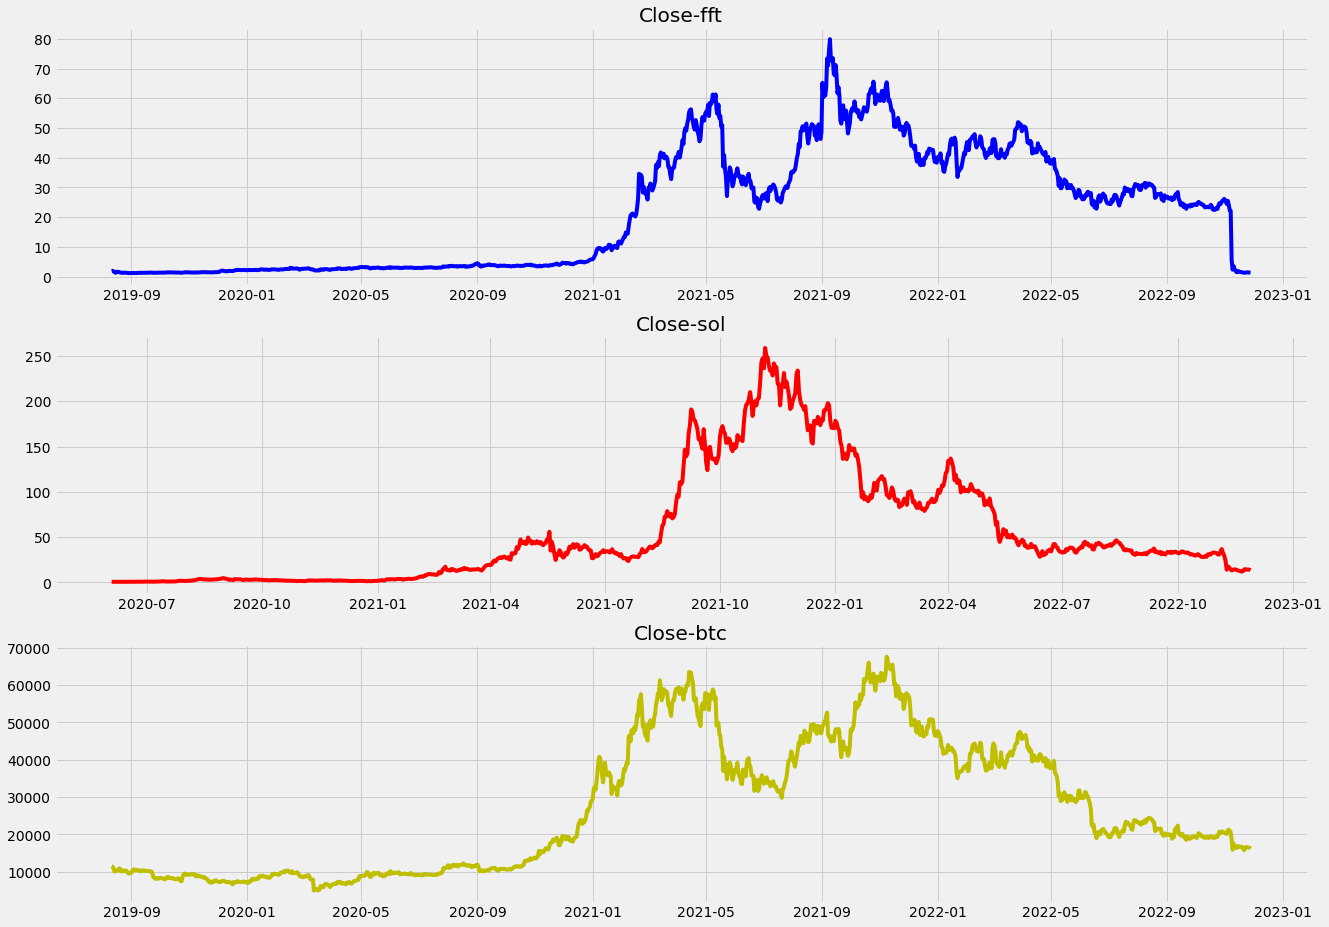

In [ ]:
fig , axs = plt.subplots(3,1,figsize= (20,15), gridspec_kw={'hspace':0.2, 'wspace': 0.1})

axs[0].plot(df_close['Close-fft'], c = 'b')
axs[0].set_title('Close-fft')
axs[1].plot(df_close['Close-sol'], c = 'r')
axs[1].set_title('Close-sol')
axs[2].plot(df_close['Close-btc'], c = 'y')
axs[2].set_title('Close-btc')

**Visualizing the values for all crypto together:**

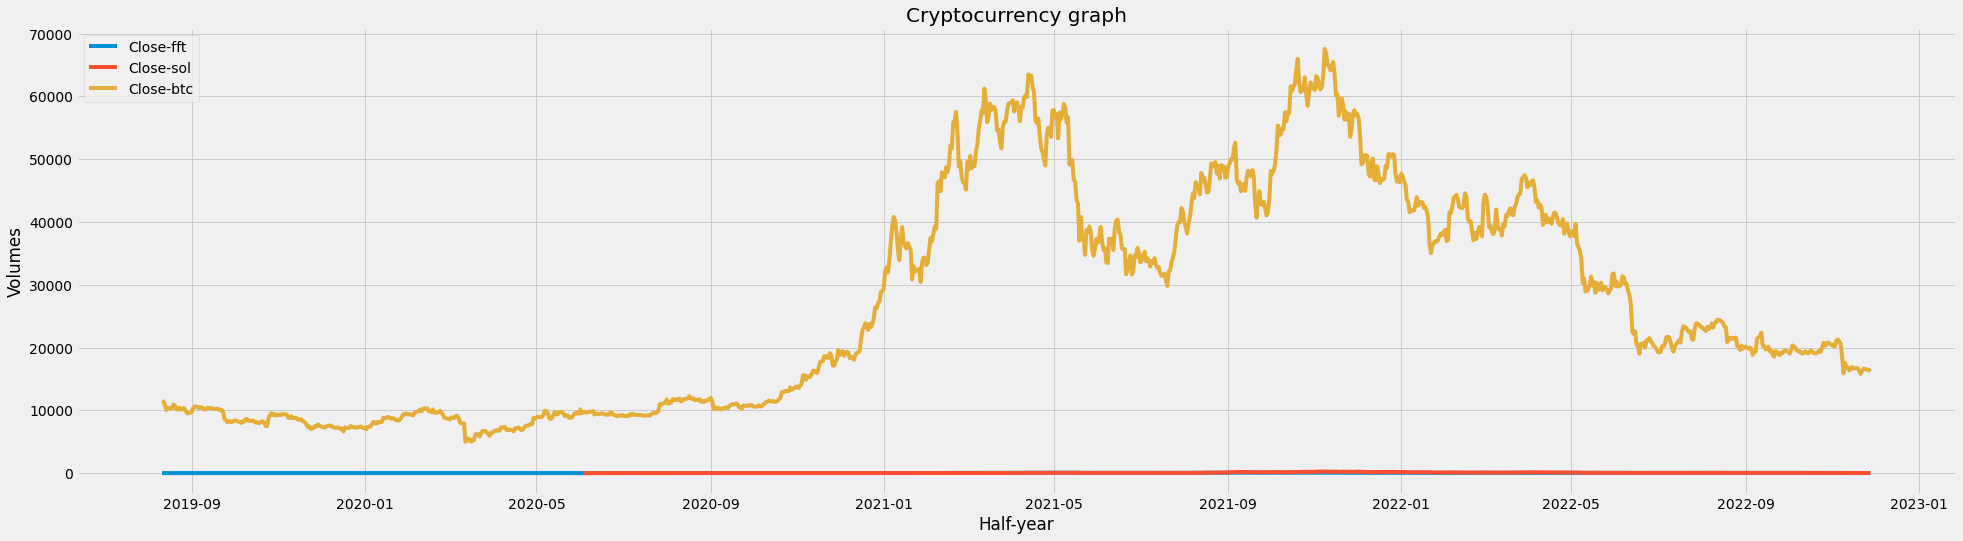

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (30,8))


for c in df_close.columns:
  plt.plot(df_close[c], label = c)

plt.title('Cryptocurrency graph')
plt.xlabel('Half-year')
plt.ylabel('Volumes')
plt.legend(df_close.columns, loc = 'upper left')

**Visualizing the values for fft and sol alone:**

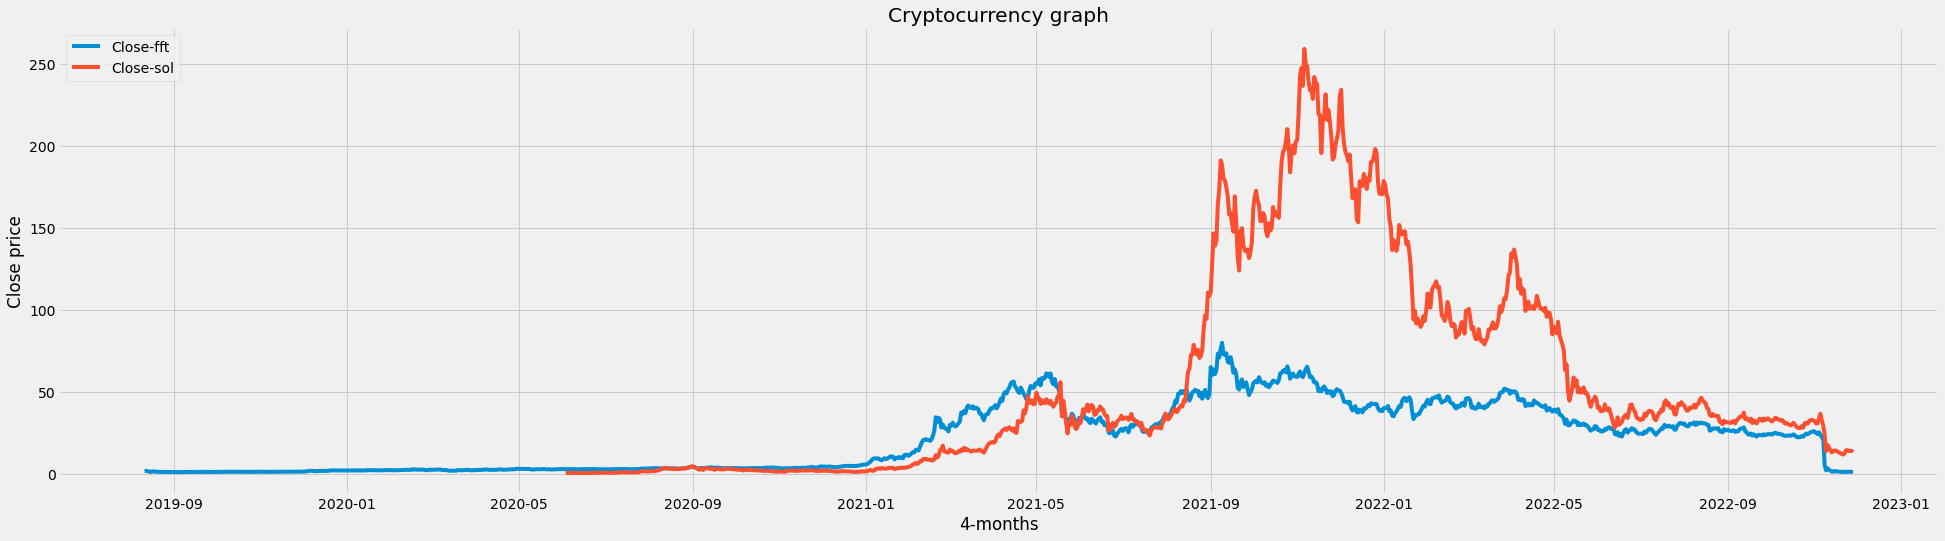

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (30,8))


for c in df_close.columns[0:2]:
  plt.plot(df_close[c], label = c)

plt.title('Cryptocurrency graph')
plt.xlabel('4-months')
plt.ylabel('Close price')
plt.legend(df_close.columns[0:2], loc = 'upper left')



---



Log values used to compare t**he way each coin price is changing**, and **not** compare **the price itself**!

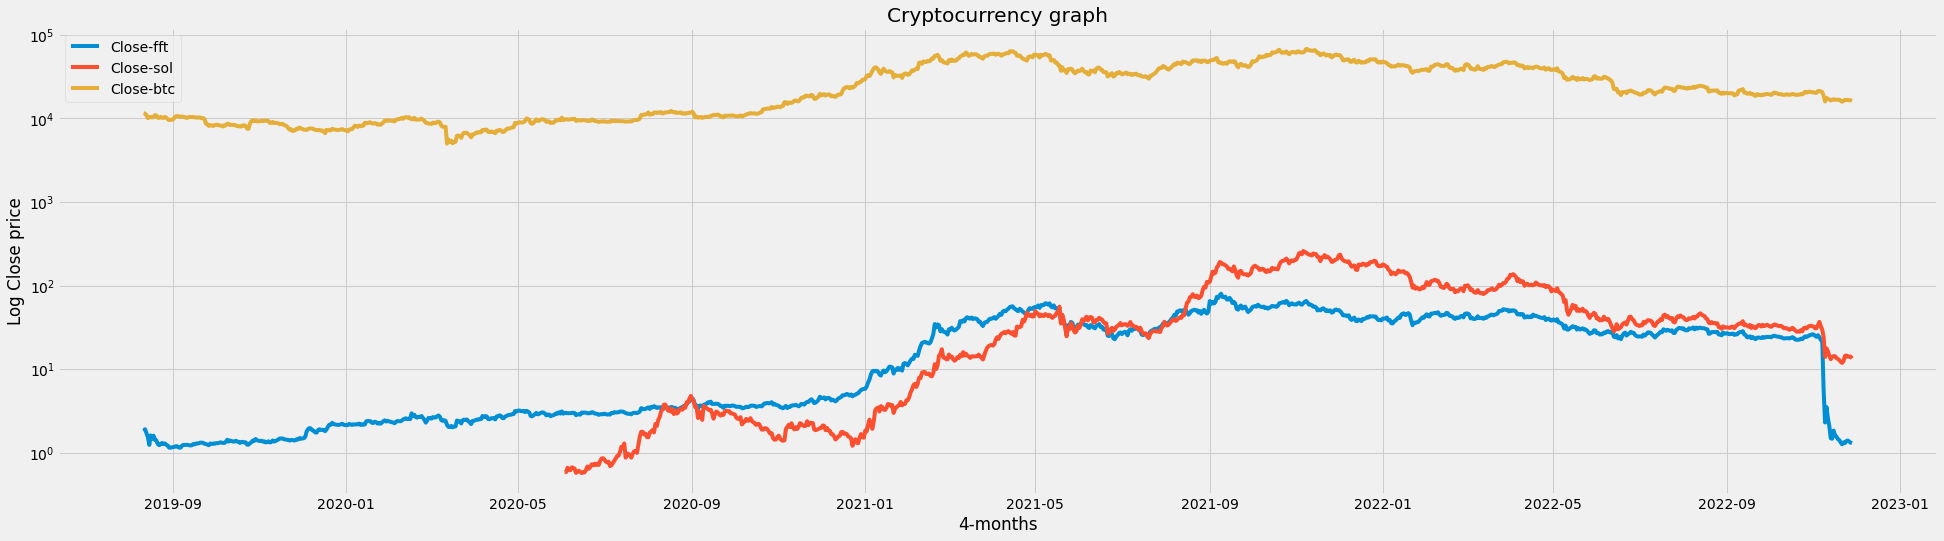

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (30,8))


for c in df_close.columns:
  plt.plot(df_close[c], label = c)

plt.title('Cryptocurrency graph')
plt.xlabel('4-months')
plt.ylabel('Log Close price')
plt.yscale('log')
plt.legend(df_close.columns, loc = 'upper left')



---



**Scaled** values used to compare **the way each coin price is changing**, and **not** compare **the price itself**!

In [ ]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,100))

scaled_values = min_max_scaler.fit_transform(df_close)
scaled_df_close = pd.DataFrame(scaled_values, columns = df_close.columns , index = df_close.index )

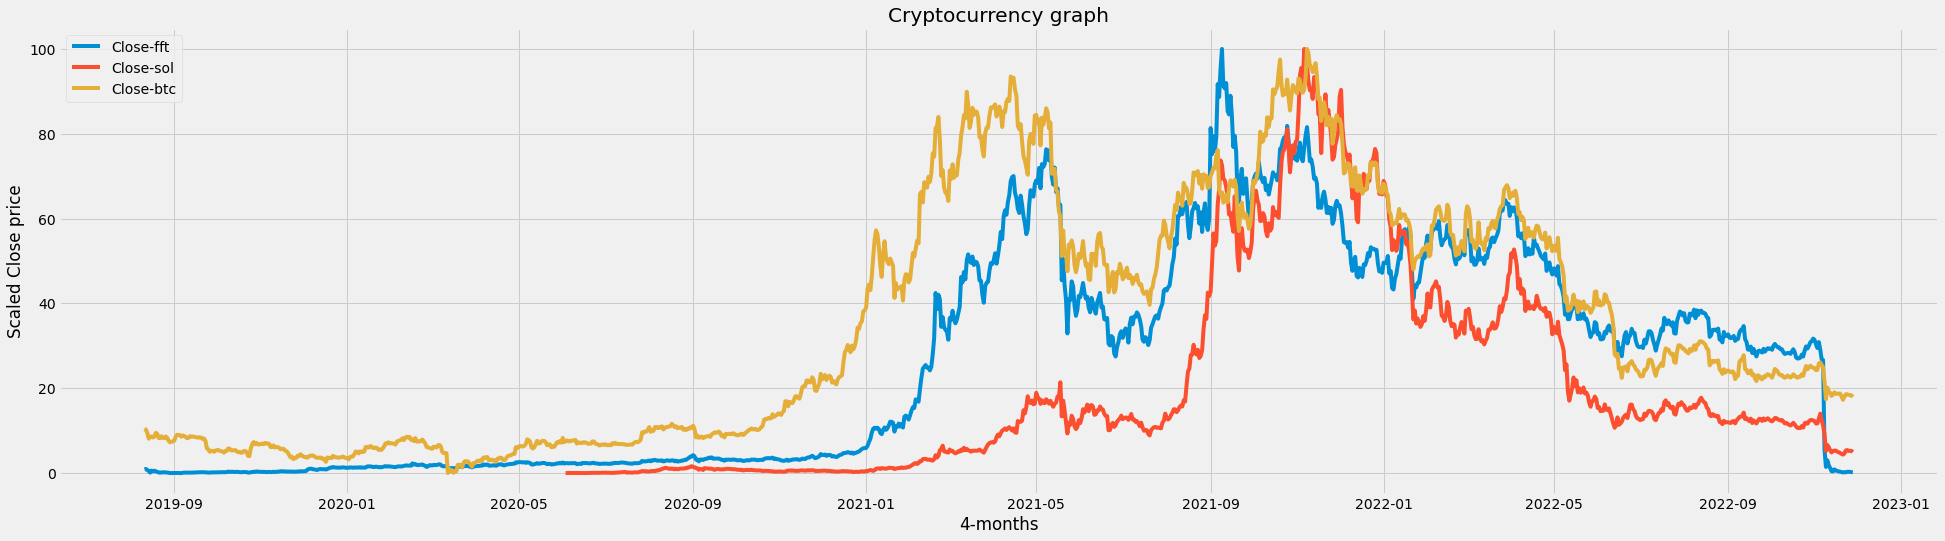

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (30,8))


for c in scaled_df_close.columns:
  plt.plot(scaled_df_close[c], label = c)

plt.title('Cryptocurrency graph')
plt.xlabel('4-months')
plt.ylabel('Scaled Close price')
plt.legend(scaled_df_close.columns, loc = 'upper left')



---



# **SDR and Cum SDR**

⭕ To compare cryptos we need **to deal with the** **returns**, and not the actual prices

**Daily simple returns DSR:** relative price changes of each cryptocurrency

**Cumulative DSR:** To get the price change over time we have to accumulate these returns

###**SDR**

In [ ]:
#Creating a df for the daily simple returns only for each of the currencies, already calculated by pct change = (previous value-current value) / previous value
df_DSR = df_fft

cols = ['pct-change']
df_DSR = df_DSR[cols]

df_DSR.rename(columns = {'pct-change':'DSR-fft'}, inplace = True)
df_DSR['DSR-sol'] = df_sol['pct-change']
df_DSR['DSR-btc'] = df_btc['pct-change']

df_DSR.head(3)

1,DSR-fft,DSR-sol,DSR-btc
Date,,,
2019-08-11,0.027933,NaN,0.014933
2019-08-12,0.038043,NaN,-0.012233
2019-08-13,-0.099476,NaN,-0.042766


Visualizing the DSR to see some sudden **spikes in the price** = here the return seemed to be very high or very low:

In [ ]:
# plt.figure(figsize=(18, 6))

# for c in df_DSR.columns.values:
#   plt.plot(df_DSR.index, df_DSR[c], label = c, lw = 2, alpha= .7 )

# plt.title('Daily simple returns')
# plt.ylabel('Percentage in decimal form')
# plt.xlabel('Days')
# plt.legend(df_DSR.columns.values, loc='upper right')
# plt.show()

Visualizing the DSR values for each currency alone, allows us to compare their **volatilities**.

(-0.6, 0.6)

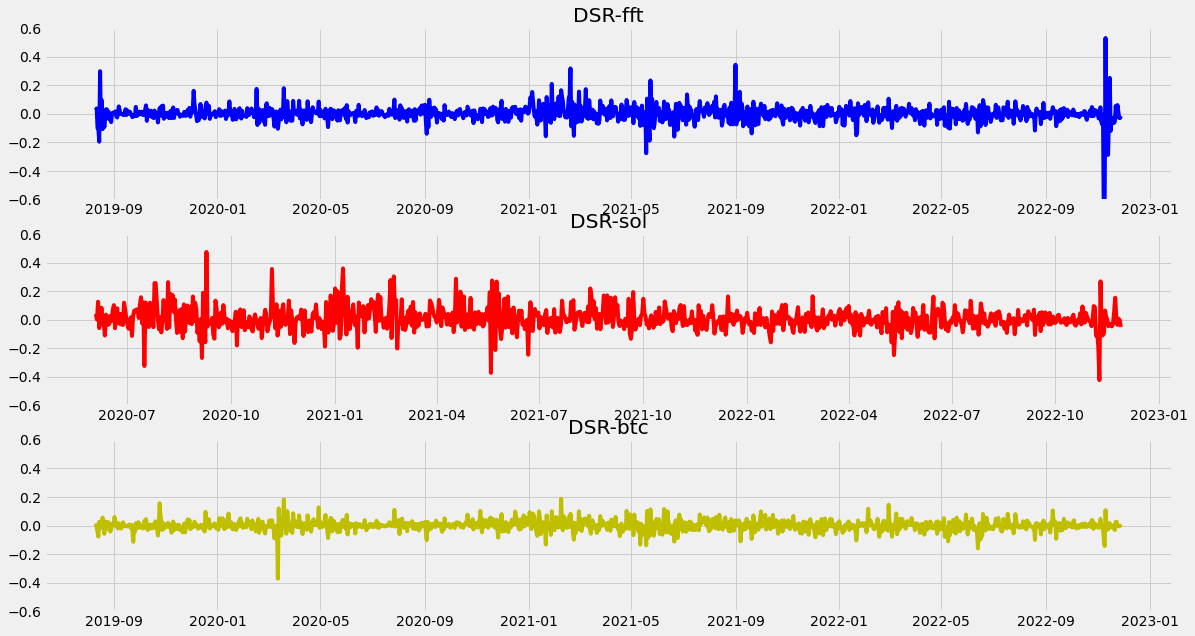

In [ ]:
fig , axs = plt.subplots(3,1,figsize= (18, 10), gridspec_kw={'hspace':0.2, 'wspace': 0.1})
#fig , axs = plt.subplots(3,1,figsize= (20,15))

axs[0].plot(df_DSR['DSR-fft'], c = 'b')
axs[0].set_title('DSR-fft')
axs[0].set_ylim([-0.6,0.6])
axs[1].plot(df_DSR['DSR-sol'], c = 'r')
axs[1].set_title('DSR-sol')
axs[1].set_ylim([-0.6,0.6])
axs[2].plot(df_DSR['DSR-btc'], c = 'y')
axs[2].set_title('DSR-btc')
axs[2].set_ylim([-0.6,0.6])



---



###**Cumulative SDR**

In [ ]:
#Calculating the cumulative daily simple returns, meaning if i invested 1$ at the first day, how much will it be at each day considering all increases and decreases
df_DSR_cum = (df_DSR + 1 ).cumprod() - 1
df_DSR_cum.head(3)

1,DSR-fft,DSR-sol,DSR-btc
Date,,,
2019-08-11,0.027933,NaN,0.014933
2019-08-12,0.067039,NaN,0.002518
2019-08-13,-0.039106,NaN,-0.040355


Text(0.5, 1.0, 'DSR-btc')

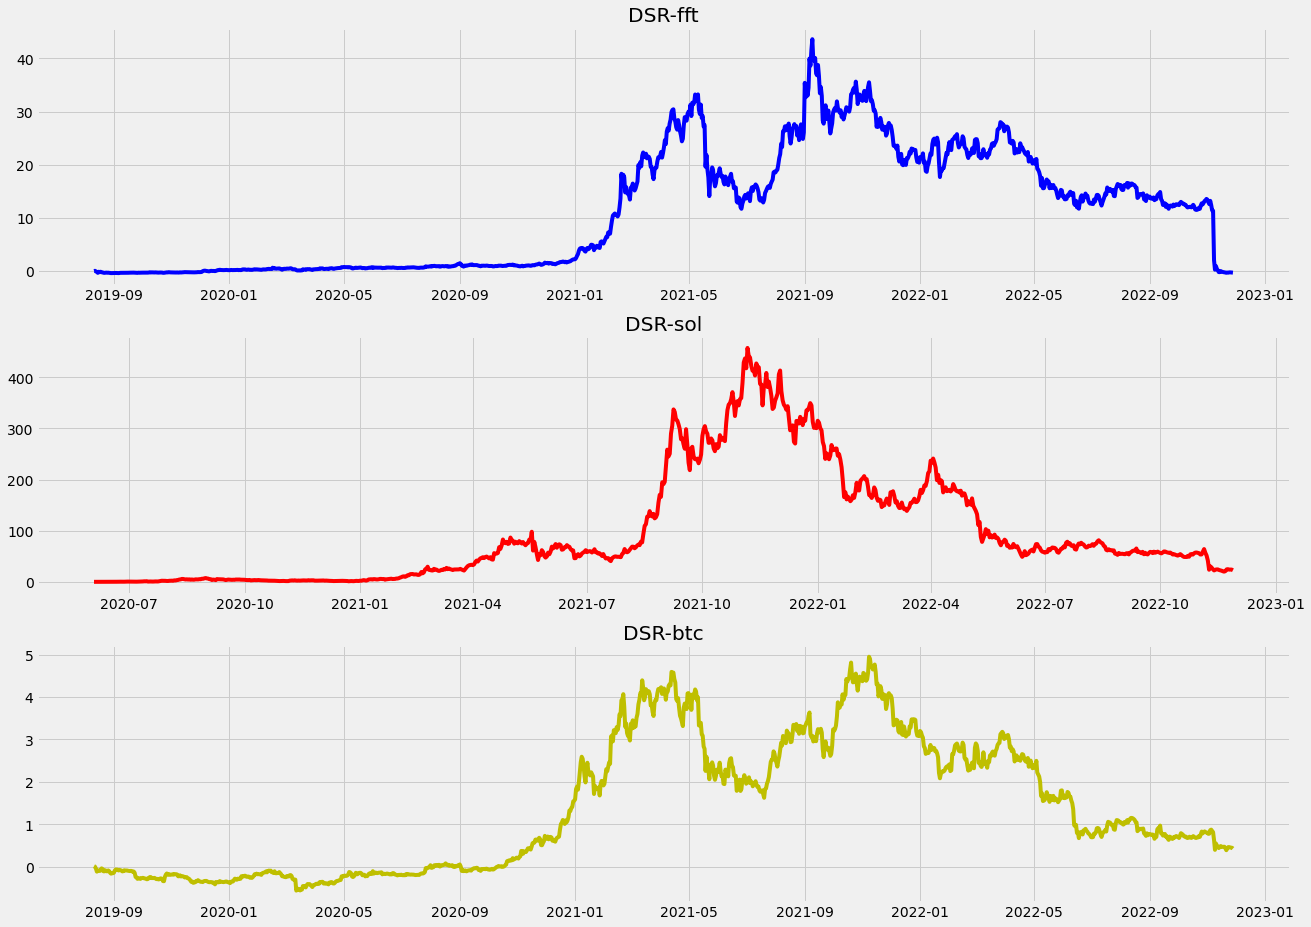

In [ ]:
# fig , axs = plt.subplots(3,1,figsize= (20,15), gridspec_kw={'hspace':0.2, 'wspace': 0.1})
fig , axs = plt.subplots(3,1,figsize= (20,15))

axs[0].plot(df_DSR_cum['DSR-fft'], c = 'b')
axs[0].set_title('DSR-fft')
axs[1].plot(df_DSR_cum['DSR-sol'], c = 'r')
axs[1].set_title('DSR-sol')
axs[2].plot(df_DSR_cum['DSR-btc'], c = 'y')
axs[2].set_title('DSR-btc')



---



###**SDR Characteristics**

⭕ **Volatility of cryptocurrencies**

**The higher the volatility is**, measured by the standard deviation, which is the square root of the variance,** the reskiest** the currency is!

In [ ]:
#Getting the volatility
print('The volatility of each currency is as follows:')
df_DSR.std()

The volatility of each currency is as follows:


1
DSR-fft    0.059088
DSR-sol    0.080501
DSR-btc    0.037486
dtype: float64

⭕ **The average daily return** of the cryptocurrencies, is not enough to choose where is better to invest, but can give an idea:

In [ ]:
#Getting the mean = average of DSR
df_DSR.mean()

1
DSR-fft    0.001843
DSR-sol    0.006705
DSR-btc    0.001015
dtype: float64

⭕ Visualizing **the distribution** of the DSR for each of the cryptocurrencies.

The wider the histogram is, **the higher values of change** are occuring frequently.

Text(0.5, 1.0, 'DSR-btc')

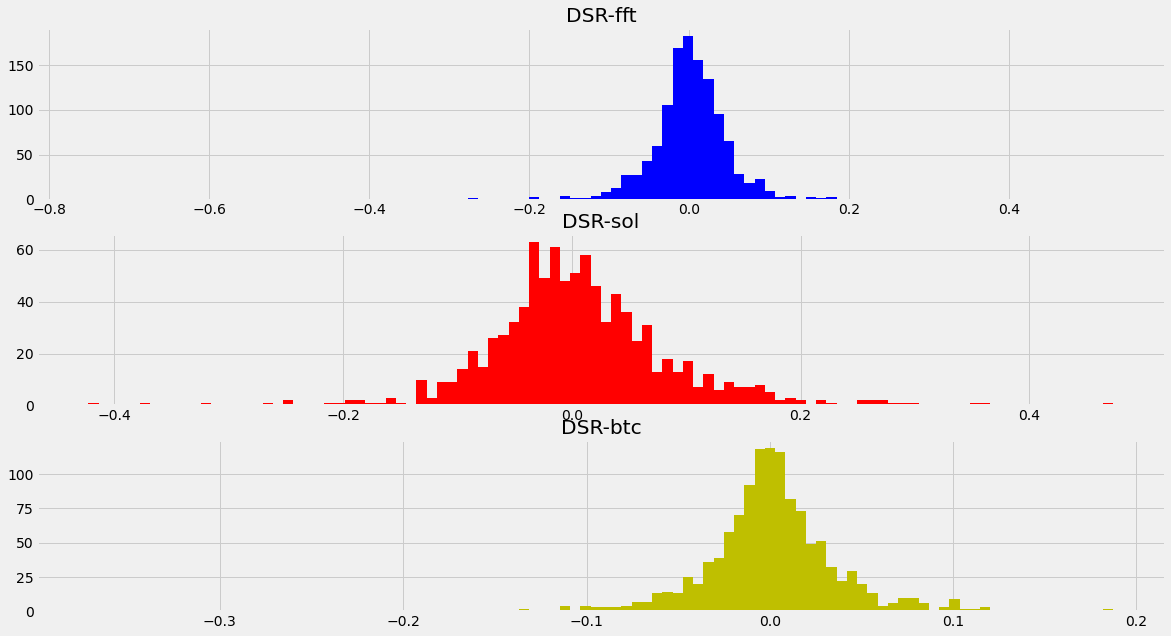

In [ ]:
fig , axs = plt.subplots(3,1,figsize= (18, 10), gridspec_kw={'hspace':0.2, 'wspace': 0.1})
#fig , axs = plt.subplots(3,1,figsize= (20,15))

axs[0].hist(df_DSR['DSR-fft'],bins=100, color = 'b')
axs[0].set_title('DSR-fft')
# axs[0].set_ylim([-0.6,0.6])
axs[1].hist(df_DSR['DSR-sol'],bins=100, color = 'r')
axs[1].set_title('DSR-sol')
# axs[1].set_ylim([-0.6,0.6])
axs[2].hist(df_DSR['DSR-btc'],bins=100, color = 'y')
axs[2].set_title('DSR-btc')
# axs[2].set_ylim([-0.6,0.6])

⭕ Visualizing **the correlation** between the DSR of each of the cryptocurrencies, to what extent each two are influenced by each other.

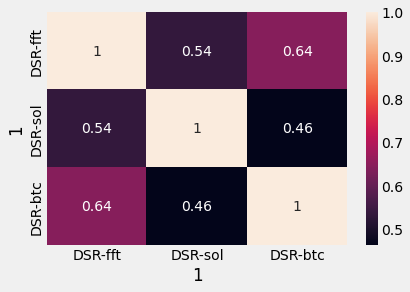

In [ ]:
sns.heatmap(df_DSR.corr(), annot=True)
plt.show()



---



# **Prices Decomposition**

The characteristics of a time series are

**Trend and Level** : Long term movement

**Seasonality** : periodic change over a fixed duration

**Random / Noise** : residual random fluctuations

This is an example of **decomposition**: Decomposing the change in  **'close'** values and in  **'volume USDC'**, to visualize its:
- real values
- trend
- seasonality
- residual noise

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_cols =  ['volume usdt', 'Volume USDc','volume difference',
                   'USDT MarCap', 'USDC MarCap', 'MarCap difference']

df_close = df_close.dropna()

for col in df_close.columns:
    decomp = seasonal_decompose(df_close[col], freq=52, model='additive', extrapolate_trend='freq')
    df_close[f"{col}_trend"] = decomp.trend
    df_close[f"{col}_seasonal"] = decomp.seasonal

df_close.head(3)

1,Close-fft,Close-sol,Close-btc,Close-fft_trend,Close-fft_seasonal,Close-sol_trend,Close-sol_seasonal,Close-btc_trend,Close-btc_seasonal
Date,,,,,,,,,
2020-06-03,2.99,0.5866,9656.717765,2.608902,1.364167,-0.598824,4.514765,8197.948625,771.210974
2020-06-04,3.00,0.5873,9800.636595,2.620783,1.883378,-0.553689,4.666358,8239.086406,915.742887
2020-06-05,2.97,0.6612,9665.532789,2.632663,1.229181,-0.508554,2.804811,8280.224188,1159.326723




---



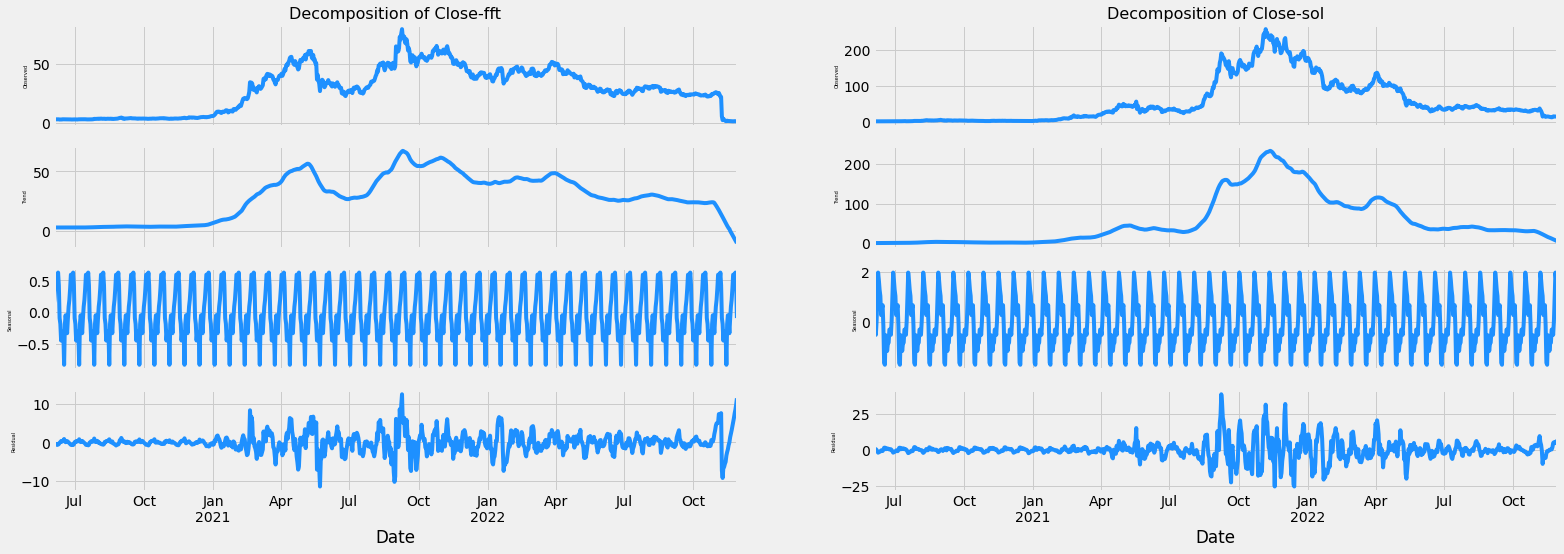

In [ ]:
fig, ax = plt.subplots(ncols=2, nrows=4, sharex=True, figsize=(24,8))

res = seasonal_decompose(df_close['Close-fft'], freq=20, model='additive', extrapolate_trend='freq')

ax[0,0].set_title('Decomposition of Close-fft', fontsize=16)
res.observed.plot(ax=ax[0,0], legend=False, color='dodgerblue')
ax[0,0].set_ylabel('Observed', fontsize=5)
res.trend.plot(ax=ax[1,0], legend=False, color='dodgerblue')
ax[1,0].set_ylabel('Trend', fontsize=5)
res.seasonal.plot(ax=ax[2,0], legend=False, color='dodgerblue')
ax[2,0].set_ylabel('Seasonal', fontsize=5)
res.resid.plot(ax=ax[3,0], legend=False, color='dodgerblue')
ax[3,0].set_ylabel('Residual', fontsize=5)


ax[0,1].set_title('Decomposition of Close-sol', fontsize=16)
res = seasonal_decompose(df_close['Close-sol'], freq=20, model='additive', extrapolate_trend='freq')
res.observed.plot(ax=ax[0, 1], legend=False, color='dodgerblue')
ax[0, 1].set_ylabel('Observed', fontsize=5)
res.trend.plot(ax=ax[1, 1], legend=False, color='dodgerblue')
ax[1, 1].set_ylabel('Trend', fontsize=5)
res.seasonal.plot(ax=ax[2, 1], legend=False, color='dodgerblue')
ax[2, 1].set_ylabel('Seasonal', fontsize=5)
res.resid.plot(ax=ax[3, 1], legend=False, color='dodgerblue')
ax[3, 1].set_ylabel('Residual', fontsize=5)

plt.show()



---



Let's decompose all the columns that we have, and compare their:

 **trends**, 
 
 while their **seasonalities** : more used for modeling that predicts future values

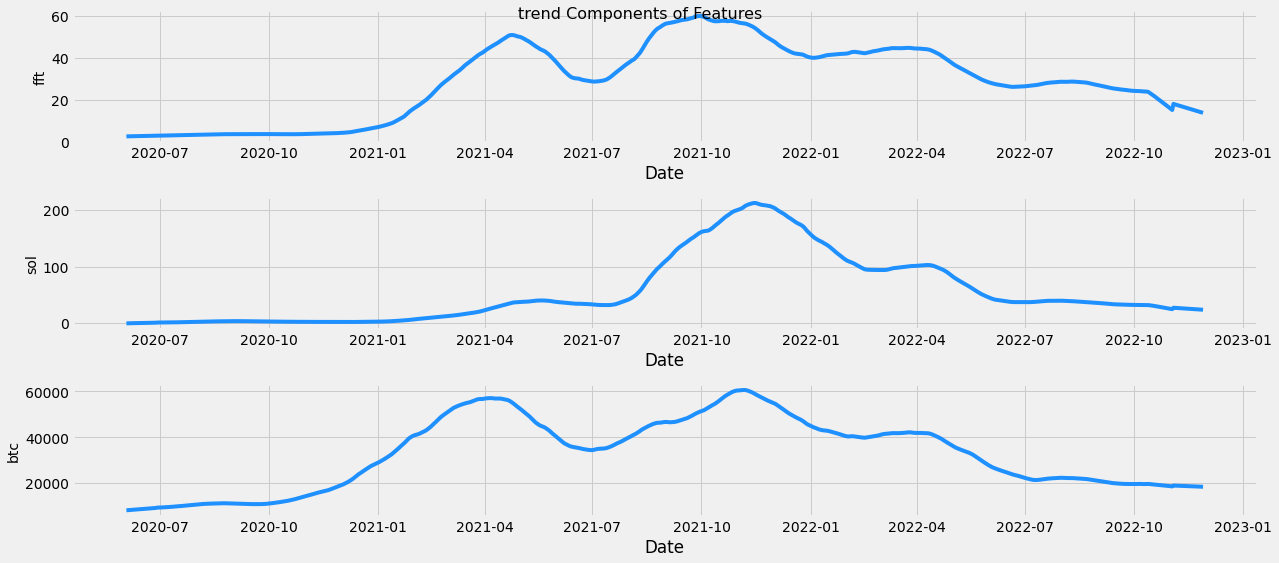

In [ ]:
f, ax = plt.subplots(nrows=3, ncols=1, figsize=(18, 8))
f.suptitle('trend Components of Features', fontsize=16)
sns.lineplot(x=df_close.index , y=df_close['Close-fft_trend'], ax=ax[0], color='dodgerblue')
ax[0].set_ylabel(ylabel='fft', fontsize=14)

sns.lineplot(x=df_close.index, y=df_close['Close-sol_trend'], ax=ax[1], color='dodgerblue')
ax[1].set_ylabel(ylabel='sol', fontsize=14)

sns.lineplot(x=df_close.index, y=df_close['Close-btc_trend'], ax=ax[2], color='dodgerblue')
ax[2].set_ylabel(ylabel='btc', fontsize=14)



#for i in range(6):
#   ax[i].set_xlim(pd.Timestamp('2019-01-16'), pd.Timestamp('2020-01-17'))

plt.tight_layout()
plt.show()



---



# **is the data predictable or random walk?**

In [ ]:
df_close.head(3)

1,Close-fft,Close-sol,Close-btc,Close-fft_trend,Close-fft_seasonal,Close-sol_trend,Close-sol_seasonal,Close-btc_trend,Close-btc_seasonal
Date,,,,,,,,,
2020-06-03,2.99,0.5866,9656.717765,2.608902,1.364167,-0.598824,4.514765,8197.948625,771.210974
2020-06-04,3.00,0.5873,9800.636595,2.620783,1.883378,-0.553689,4.666358,8239.086406,915.742887
2020-06-05,2.97,0.6612,9665.532789,2.632663,1.229181,-0.508554,2.804811,8280.224188,1159.326723


Applying the example of **'close_btc'** column data only for now.

We can apply it to any column and check if the data is predictable or not.

In general, stock data and crypto data are not predictable, some minimal cases, are predictable.

To use data for modeling, it should be stationary, by stationary we mean:

mean = zero
the variance is constant

so we first use adfuller method to check stationarity, if it is not stationary, we apply the difference method on the data to make it stationary.

In [ ]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
# Visualizations
lag_acf = 15
lag_pacf = 15
height = 4
width = 12

def check_stationarity(series):
    # Copied from https://machinelearningmastery.com/time-series-data-stationary-python/

    result = adfuller(series.values)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

In [ ]:
check_stationarity(df_close['Close-btc'])

ADF Statistic: -1.487437
p-value: 0.539717
Critical Values:
	1%: -3.438
	5%: -2.865
	10%: -2.568
Non-stationary


It showed that it is **not stationary**, so we apply differencing.

In [ ]:
df_close['Close-btc diff'] = df_close['Close-btc'].diff().fillna(0)

display(df_close.head(3).style.set_caption('df_close Time Series'))

check_stationarity(df_close['Close-btc diff'])

1,Close-fft,Close-sol,Close-btc,Close-fft_trend,Close-fft_seasonal,Close-sol_trend,Close-sol_seasonal,Close-btc_trend,Close-btc_seasonal,Close-btc diff
Date,,,,,,,,,,
2020-06-03 00:00:00,2.990000,0.586600,9656.717765,2.608902,1.364167,-0.598824,4.514765,8197.948625,771.210974,0.000000
2020-06-04 00:00:00,3.000000,0.587300,9800.636595,2.620783,1.883378,-0.553689,4.666358,8239.086406,915.742887,143.918830
2020-06-05 00:00:00,2.970000,0.661200,9665.532789,2.632663,1.229181,-0.508554,2.804811,8280.224188,1159.326723,-135.103806


ADF Statistic: -31.027482
p-value: 0.000000
Critical Values:
	1%: -3.438
	5%: -2.865
	10%: -2.568
Stationary


Comparing the **real data of 'Close-btc'** with the **differenced data of 'Close-btc'**

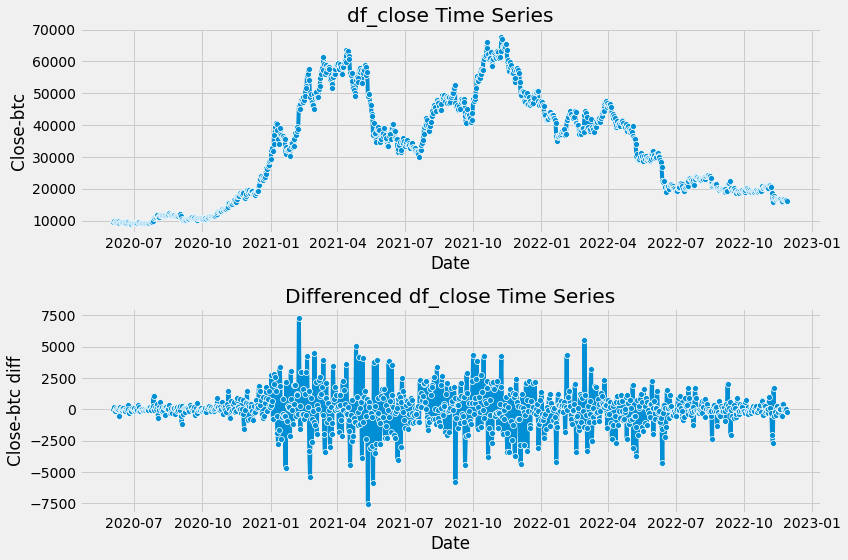

In [ ]:
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

sns.lineplot(x=df_close.index, y=df_close['Close-btc'], marker='o', ax=ax[0])
# ax[0].set_xlim([sample.timestamp.iloc[0], sample.timestamp.iloc[-1]])

ax[0].set_title('df_close Time Series')

sns.lineplot(x=df_close.index, y=df_close['Close-btc diff'], marker='o', ax=ax[1])
# ax[1].set_xlim([sample.timestamp.iloc[0], sample.timestamp.iloc[-1]])
ax[1].set_title('Differenced df_close Time Series')
plt.tight_layout()
plt.show()

Since data is now stationary, we plot the **ACF** autocorrelation function and the **PACF** partial autocorrelation function, to see if we can use the ARIMA model or not

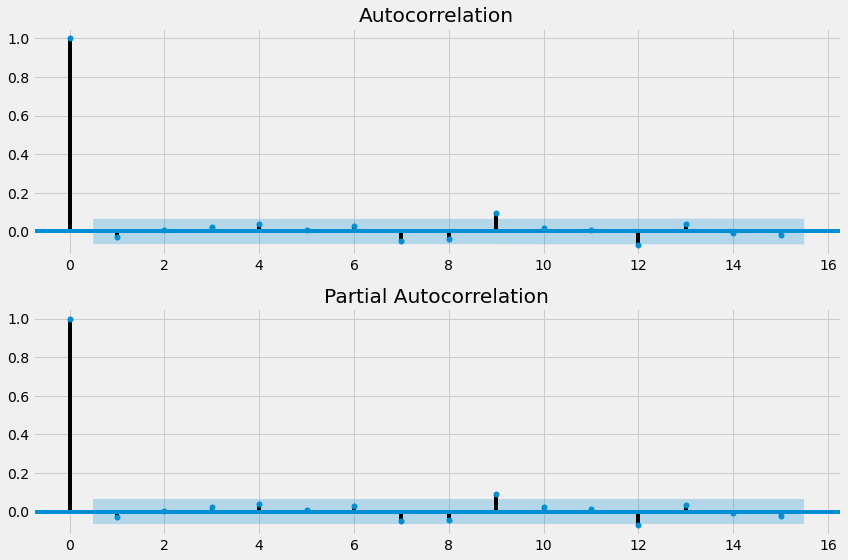

In [ ]:
T = 12
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(width, 2*height))
plot_acf(df_close['Close-btc diff'],lags=lag_acf, ax=ax[0])
plot_pacf(df_close['Close-btc diff'],lags=lag_pacf, ax=ax[1], method='ols')

# for i in range(2):
#     ax[i].axvline(x=T, color='r', linestyle='--')
#     ax[i].set_xlim([-0.5, lag_acf+0.5])
#     ax[i].set_ylim([-1.1, 1.1])
    
plt.tight_layout()
plt.show()

By interpreting the ACF and PACF plots, we conclude that we don't have significant correlations between data at type t and data at time t-k where k is any lag back in time.

So we can't model and predict the data using the ARIMA model, we may use other models like Prophet or LSTM deep learning models, and see if they can provide acceptable scores in terms of accuracy.